In [5]:
import numpy as np
from eryn.backends import HDFBackend as eryn_HDF_Backend
import matplotlib.pyplot as plt
import corner
import os
import matplotlib.lines as mlines

ModuleNotFoundError: No module named 'eryn'

In [4]:
# Now analyse the results using 9PN for circular orbits

reader = eryn_HDF_Backend('../data_files/test_few.h5',read_only = True)

N_iterations_circ_9PN = reader_circ_9PN_vs_reg_few_eryn.get_chain()['model_0'].shape[0]
ntemps_circ_9PN = reader_circ_9PN_vs_reg_few_eryn.get_chain()['model_0'].shape[1]
nwalkers_circ_9PN = reader_circ_9PN_vs_reg_few_eryn.get_chain()['model_0'].shape[2]

reader_circ_9PN_vs_reg_few_eryn.get_chain()['model_0']

collected_samps_circ_9PN_vs_reg_few_temps = [reader_circ_9PN_vs_reg_few_eryn.get_chain(discard = 800)['model_0'][:,i].reshape(-1,9) 
                    for i in range(ntemps_circ_9PN)]  # Take true chain]

# collected_samps_ecc_reg_few_vs_reg_few = [reader_ecc_reg_few_vs_reg_few.get_chain(discard = 0)[:,:,j].flatten()for j in range(N_params_ecc)]

log_like_9PN_circ = reader_circ_9PN_vs_reg_few_eryn.get_log_like(discard = 0)

NameError: name 'eryn_HDF_Backend' is not defined

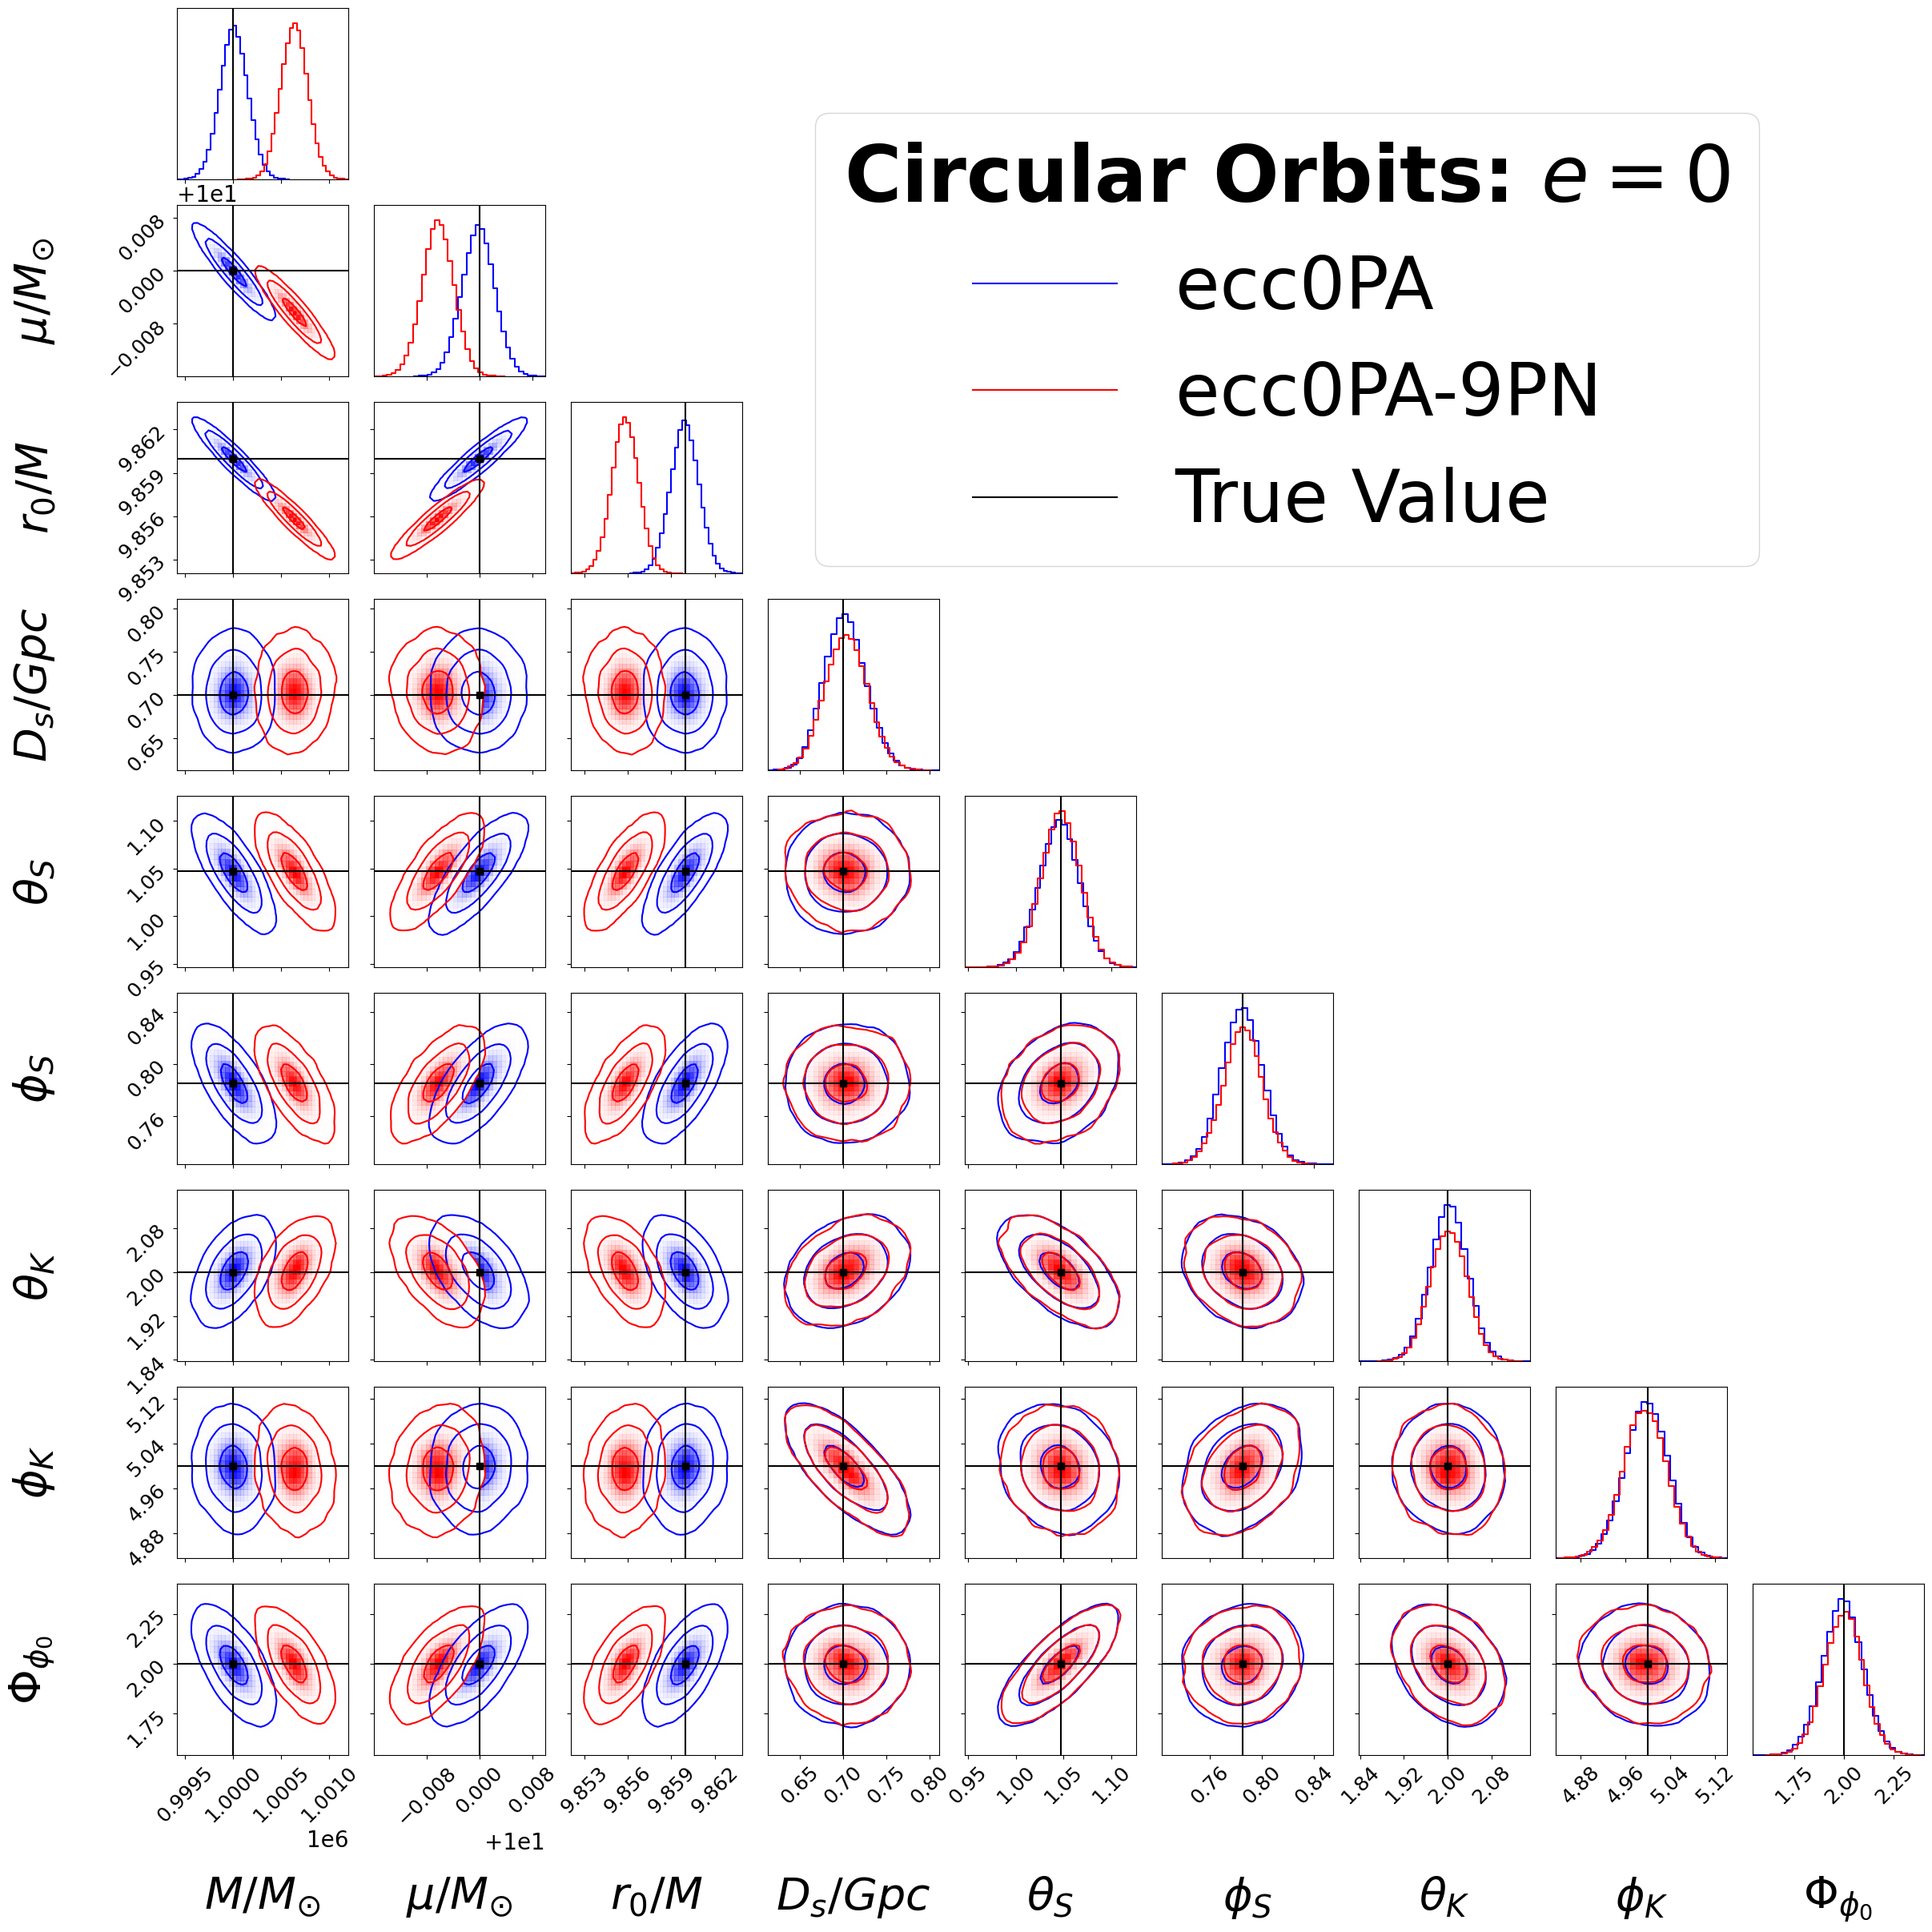

In [ ]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

# Now check the corner plot, check all are gaussian.

# Corner plot
# os.chdir(plot_directory)
params_corner_circ =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$r_{0}/M$", r"$D_{s}/Gpc$", r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", r"$\Phi_{\phi_{0}}$"] 

true_vals_circ = np.array([1e6,10,9.86,0.7,np.pi/3,np.pi/4,2.0, 5.0, 2])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_corner_circ, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

N_params_circ = len(params_corner_circ)

import corner
samples_reg_few_vs_reg_few = np.column_stack(collected_samps_circ_reg_few_vs_reg_few)

weights = len(collected_samps_circ_reg_few_vs_reg_few[0])/len(collected_samps_circ_9PN_vs_reg_few_temps[0][:,0]) * np.ones(len(collected_samps_circ_9PN_vs_reg_few_temps[0][:,0]))

figure = corner.corner(samples_reg_few_vs_reg_few,bins = 30, color = 'blue', **corner_kwargs)

corner.corner(collected_samps_circ_9PN_vs_reg_few_temps[0], fig = figure, bins = 30, color = 'red', weights = weights, **corner_kwargs)

axes = np.array(figure.axes).reshape((N_params_circ, N_params_circ))

for i in range(N_params_circ):
    ax = axes[i, i]
    ax.axvline(true_vals_circ[i], color="k")
    
for yi in range(N_params_circ):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals_circ[yi], color="k")
        ax.axvline(true_vals_circ[xi],color= "k")
        ax.plot(true_vals_circ[xi], true_vals_circ[yi], "sk")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=18)
  
blue_line = mlines.Line2D([], [], color='blue', label=r'ecc0PA')
red_line = mlines.Line2D([], [], color='red', label=r'ecc0PA-9PN')
black_line = mlines.Line2D([], [], color='black', label='True Value')

plt.legend(handles=[blue_line,red_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params_circ + 0.8), loc="upper right", title = r"Circular Orbits: $e = 0$", title_fontproperties = FontProperties(size = 70, weight = 'bold'))
plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)

os.chdir('/home/ad/burkeol/work/1PA_systematics/Data_Analysis/Paper_Plots')
plt.savefig("Circular_9PN_adiabatic_e_0.pdf",bbox_inches = 'tight', dpi=20)

# os.chdir('../../../notebooks/normal_mass_ratio/Eccentricity/plots_ecc_vs_circ/')
# plt.savefig("paper_circ_Lorenzo.pdf",pad_inches=0.2, bbox_inches='tight')
# plt.show()
